In [ ]:
#WIP!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [4]:
import numpy as np
from numpy import matrix as mat
from matplotlib import pyplot as plt
import random

In [5]:
n = 100
a1, b1, c1 = 1,3,2 # Este es el parámetro real de la función y (x) que debe ajustarse
h = np.linspace (0,1, n) # Genera datos que contienen ruido
y = [np.exp(a1*i**2+b1*i+c1)+random.gauss(0,4) for i in h]
y = mat (y) # Convertir a forma matricial

In [6]:
def Func (abc, iput): # La función que se va a ajustar, abc es una matriz que contiene tres parámetros [[a], [b], [c]]
    a = abc[0,0]
    b = abc[1,0]
    c = abc[2,0]
    return np.exp(a*iput**2+b*iput+c)

In [7]:
def Deriv (abc, iput, n): # Encuentra la derivada parcial de la función
    x1 = abc.copy()
    x2 = abc.copy()
    x1[n,0] -= 0.000001
    x2[n,0] += 0.000001
    p1 = Func(x1,iput)
    p2 = Func(x2,iput)
    d = (p2-p1)*1.0/(0.000002)
    return d

step = 1,abs(mse-lase_mse) = 0.06571516
step = 2,abs(mse-lase_mse) = 0.11472841
step = 3,abs(mse-lase_mse) = 0.17201235
step = 4,abs(mse-lase_mse) = 0.00837318
step = 5,abs(mse-lase_mse) = 0.00005803
step = 6,abs(mse-lase_mse) = 0.00000003
[[1.02100088]
 [2.98366127]
 [1.99815865]]


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 100 and the array at index 1 has size 1

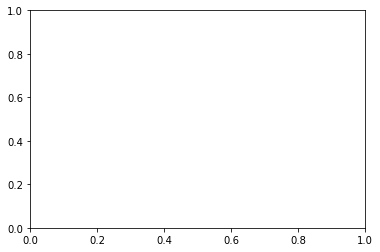

In [8]:
J = mat (np.zeros ((n, 3))) #Jacobi matrix
fx = mat (np.zeros ((n, 1))) # f (x) 100 * 1 error
fx_tmp = mat(np.zeros((n,1)))
xk = mat ([[0.8], [2.7], [1.5]]) # inicialización de parámetro
lase_mse = 0
step = 0
u,v= 1,2
conve = 100

while (conve):

    mse,mse_tmp = 0,0
    step += 1

    for i in range(n):
        fx [i] = Func (xk, h [i]) - y [0, i] # Tenga en cuenta que no se puede escribir como y-Func, de lo contrario divergerá
        mse += fx[i,0]**2

        for j in range(3):
            J [i, j] = Deriv (xk, h [i], j) # derivada numérica
            mse /= n # restricción de rango

    H = J.T*J + u*np.eye(3)   # 3*3
    dx = -H.I * J.T * fx # Tenga en cuenta que hay un signo menos, que corresponde al signo de fx = Func-y
    xk_tmp = xk.copy()
    xk_tmp += dx

    for j in range(n):
        fx_tmp[i] =  Func(xk_tmp,h[i]) - y[0,i]
        mse_tmp += fx_tmp[i,0]**2

    mse_tmp /= n
    q = (mse - mse_tmp)/((0.5*dx.T*(u*dx - J.T*fx))[0,0])
    if q > 0:
        s = 1.0/3.0
        v = 2
        mse = mse_tmp
        xk = xk_tmp
        temp = 1 - pow(2*q-1,3)

        if s > temp:
            u = u*s
        else:
            u = u*temp
    else:
        u = u*v
        v = 2*v
        xk = xk_tmp

    print("step = %d,abs(mse-lase_mse) = %.8f" %(step,abs(mse-lase_mse)))
    if abs(mse-lase_mse)<0.000001:
        break

    lase_mse = mse # registra la posición del mse anterior
    conve -= 1
print(xk)

z = [Func (xk, i) for i in h] # Dibujar con los parámetros ajustados

plt.figure(0)
plt.scatter(h,y,s = 4)
plt.plot(h,z,'r')
plt.show()